In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("MPI_national.csv")
df.head()

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9


In [ ]:
print(df.shape)

(102, 8)


In [ ]:
df.isnull().sum()

ISO                               0
Country                           0
MPI Urban                         0
Headcount Ratio Urban             0
Intensity of Deprivation Urban    0
MPI Rural                         0
Headcount Ratio Rural             0
Intensity of Deprivation Rural    0
dtype: int64

In [ ]:
urban = df[['ISO','Country','MPI Urban','Headcount Ratio Urban','Intensity of Deprivation Urban']]
urban.head()

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban
0,KAZ,Kazakhstan,0.000,0.0,33.3
1,SRB,Serbia,0.000,0.1,41.4
2,KGZ,Kyrgyzstan,0.000,0.1,40.2
3,TUN,Tunisia,0.000,0.1,35.6
4,ARM,Armenia,0.001,0.2,33.3


In [ ]:
rural = df[['ISO','Country','MPI Rural','Headcount Ratio Rural','Intensity of Deprivation Rural']]
rural.head()

,ISO,Country,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.09,33.3
1,SRB,Serbia,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.003,0.70,37.1
3,TUN,Tunisia,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.39,36.9


In [ ]:
import matplotlib.pyplot as plt

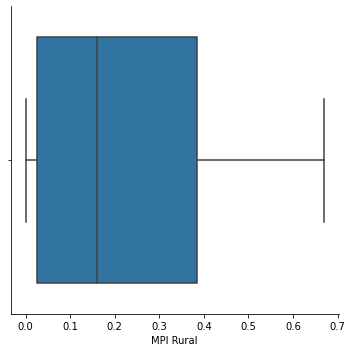

In [ ]:
sns.catplot(x='MPI Rural',kind='box',data = rural)

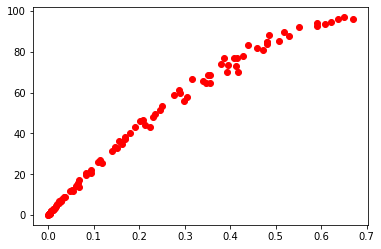

In [37]:
plt.scatter(rural['MPI Rural'],rural['Headcount Ratio Rural'],c='red')

Text(0.5, 1.0, 'MPI - Headcount')

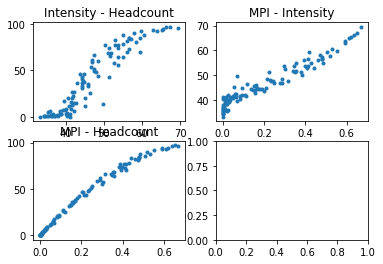

In [48]:
fig,(ax) = plt.subplots(2,2)
ax[0,0].plot(rural['Intensity of Deprivation Rural'],rural['Headcount Ratio Rural'],linewidth=0,marker='.')
ax[0,0].set_title('Intensity - Headcount')
ax[0,1].plot(rural['MPI Rural'],rural['Intensity of Deprivation Rural'],linewidth=0,marker='.')
ax[0,1].set_title('MPI - Intensity')
ax[1,0].plot(rural['MPI Rural'],rural['Headcount Ratio Rural'],linewidth=0,marker='.')
ax[1,0].set_title('MPI - Headcount')

In [49]:
lr = LinearRegression()

In [92]:
x = rural.iloc[:,[2,4]].values
y = rural.iloc[:,[-2]].values

In [102]:
print(x[0:5])

[[0.00e+00 3.33e+01]
 [2.00e-03 4.03e+01]
 [3.00e-03 3.71e+01]
 [1.20e-02 3.87e+01]
 [1.00e-03 3.69e+01]]


In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(y_test[0:7])

[[ 3.18]
 [78.04]
 [ 4.25]
 [ 2.49]
 [ 2.86]
 [72.92]
 [14.44]]


In [112]:
lr.fit(x_train,y_train)

LinearRegression()

In [118]:
y_pred = lr.predict(x_test)
print(y_pred[0:7])

[[ 7.19626972]
 [75.67104496]
 [ 6.7956865 ]
 [ 6.80437738]
 [ 8.5094712 ]
 [71.23678721]
 [13.63102903]]


In [119]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

In [122]:
print("The mean absolute error : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error : ",mean_squared_error(y_test,y_pred))
print("The r2_score : ",r2_score(y_test,y_pred))

The mean absolute error :  4.614127107754172
the mean squared error :  28.30047267337589
The r2_score :  0.9732900916978581


#For Urban Areas:

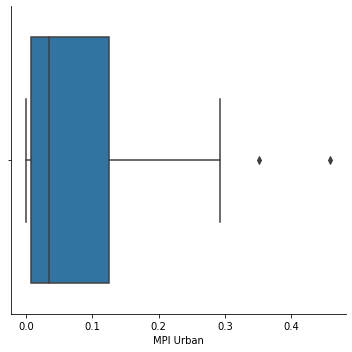

In [125]:
sns.catplot(x='MPI Urban',kind='box',data=urban)

#Removing Outliers

In [126]:
Q3 = urban['MPI Urban'].quantile(.75)
Q1 = urban['MPI Urban'].quantile(.25)

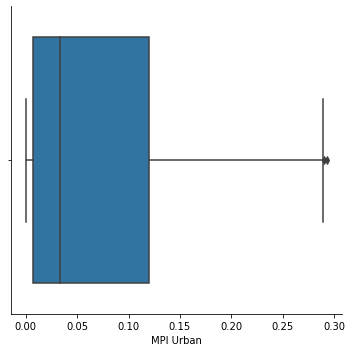

In [136]:
IQR = Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
df1=urban[(urban['MPI Urban']>lb) & (urban['MPI Urban']<ub) ]
df1.shape
df1.tail()
sns.catplot(x='MPI Urban',kind='box',data=df1)

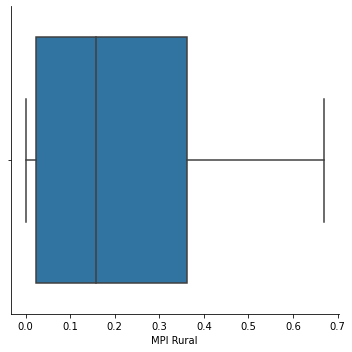

In [178]:
df2=rural[(urban['MPI Urban']>lb) & (urban['MPI Urban']<ub) ]
sns.catplot(x='MPI Rural',kind='box',data=df2)

In [183]:
print(df1.head(),'\n',df2.head())

   ISO     Country  MPI Urban  Headcount Ratio Urban  \
0  KAZ  Kazakhstan      0.000                    0.0   
1  SRB      Serbia      0.000                    0.1   
2  KGZ  Kyrgyzstan      0.000                    0.1   
3  TUN     Tunisia      0.000                    0.1   
4  ARM     Armenia      0.001                    0.2   

   Intensity of Deprivation Urban  
0                            33.3  
1                            41.4  
2                            40.2  
3                            35.6  
4                            33.3   
    ISO     Country  MPI Rural  Headcount Ratio Rural  \
0  KAZ  Kazakhstan      0.000                   0.09   
1  SRB      Serbia      0.002                   0.50   
2  KGZ  Kyrgyzstan      0.003                   0.70   
3  TUN     Tunisia      0.012                   3.18   
4  ARM     Armenia      0.001                   0.39   

   Intensity of Deprivation Rural  
0                            33.3  
1                            40.3  


In [137]:
print(df1.isnull().sum())

ISO                               0
Country                           0
MPI Urban                         0
Headcount Ratio Urban             0
Intensity of Deprivation Urban    0
dtype: int64


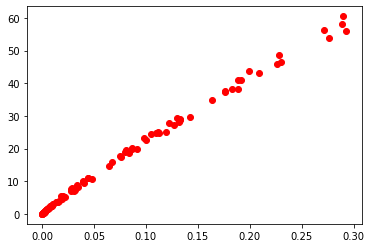

In [138]:
plt.scatter(df1['MPI Urban'],df1['Headcount Ratio Urban'],c='red')

In [140]:
df1.head(7)

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban
0,KAZ,Kazakhstan,0.000,0.0,33.3
1,SRB,Serbia,0.000,0.1,41.4
2,KGZ,Kyrgyzstan,0.000,0.1,40.2
3,TUN,Tunisia,0.000,0.1,35.6
4,ARM,Armenia,0.001,0.2,33.3
5,MKD,"Macedonia, The former Yugoslav Republic of",0.001,0.3,36.3
6,TKM,Turkmenistan,0.001,0.4,33.9


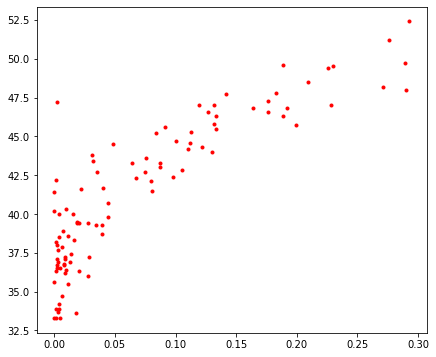

In [142]:
plt.figure(figsize=(7,6))
plt.plot(df1['MPI Urban'],df1['Intensity of Deprivation Urban'],linewidth = 0,marker='.',color='red')

#Comparing Rural and Urban attributes using comparative bar graphs

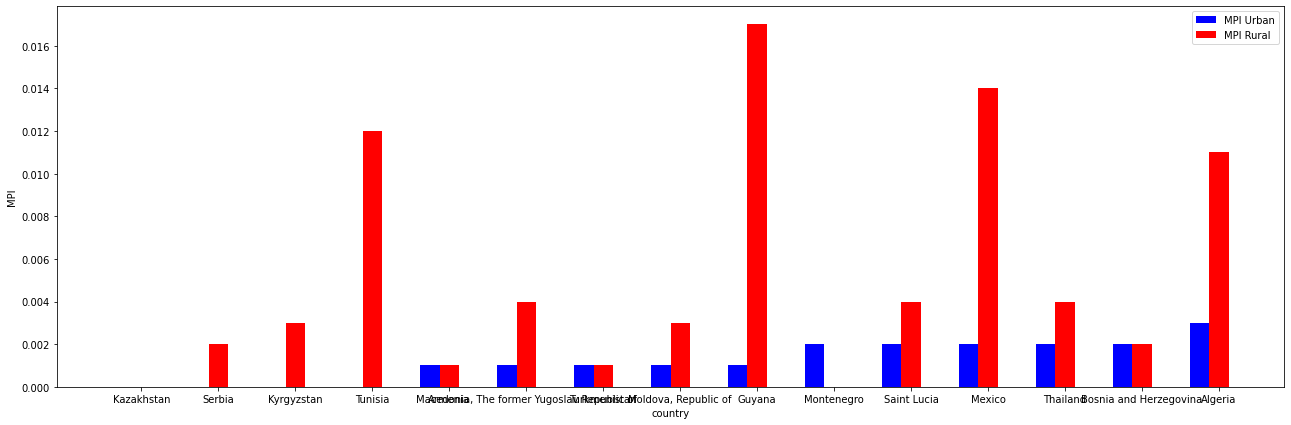

In [179]:
df1.shape
N=15
plt.figure(figsize=(22,7))
ind = np.arange(N)
width=0.25
xval = df1['MPI Urban'].head(15)
bar1 = plt.bar(ind,xval,width,color='blue')
yval = df2['MPI Rural'].head(15)
bar2 = plt.bar(ind+width,yval,width,color='red')
plt.xlabel('country')
plt.ylabel('MPI')
plt.xticks(ind+width, df1['Country'].head(15))
plt.legend((bar1, bar2),('MPI Urban', 'MPI Rural'))

First 15 (HeadCount Ratio)

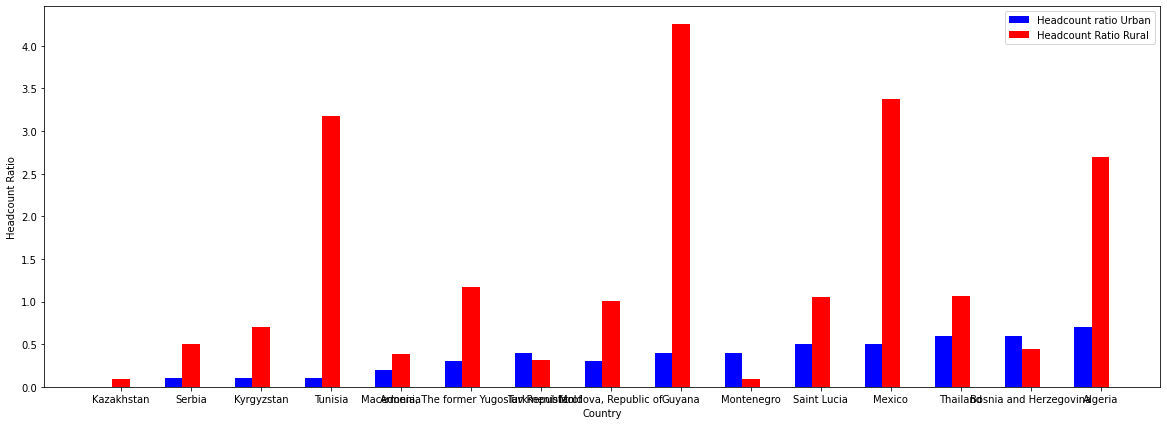

In [180]:
M=15
inde = np.arange(N)
width = 0.25
plt.figure(figsize=(20,7))
xv = df1['Headcount Ratio Urban'].head(15)
yv = df2['Headcount Ratio Rural'].head(15)
xbar = plt.bar(inde,xv,width,color='blue')
ybar = plt.bar(inde+width,yv,width,color='red')
plt.xlabel("Country")
plt.ylabel("Headcount Ratio")
plt.xticks(ind+width,df1['Country'].head(15))
plt.legend((xbar,ybar),("Headcount ratio Urban","Headcount Ratio Rural"))

Last 15 (Headcount Ratio)

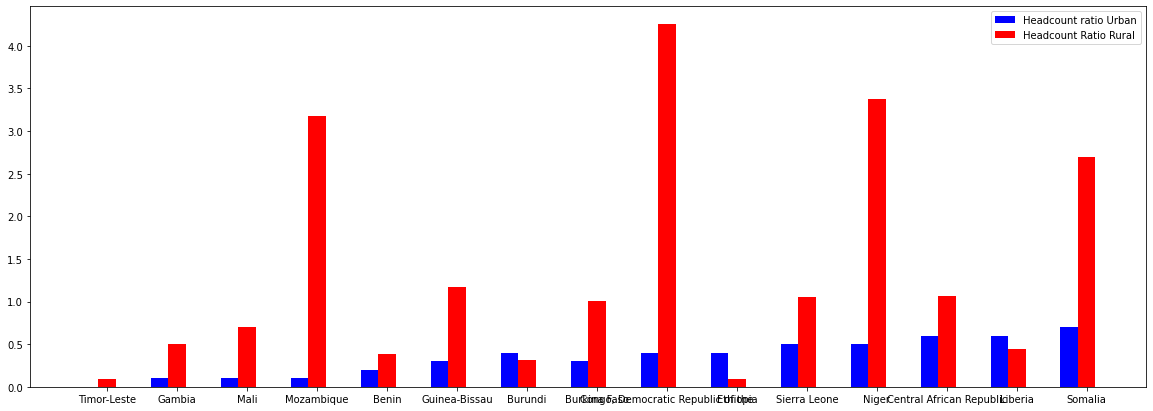

In [182]:
plt.figure(figsize=(20,7))
xv1 = df1['Headcount Ratio Urban'].tail(15)
yv1 = df2['Headcount Ratio Rural'].tail(15)
xbar = plt.bar(inde,xv,width,color='blue')
ybar = plt.bar(inde+width,yv,width,color='red')
plt.xticks(ind+width,df1['Country'].tail(15))
plt.legend((xbar,ybar),("Headcount ratio Urban","Headcount Ratio Rural"))

In [162]:
lr1 = LinearRegression()
x1 = df1.iloc[:,[2,4]].values
y1 = df1.iloc[:,[-2]].values

In [169]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.75)
lr1.fit(x1_train,y1_train)

LinearRegression()

In [174]:
y1_pred = lr1.predict(x1_test)
print(y1_pred[:10])
print("\n",y1_test[:10])

[[ 4.50953   ]
 [21.3977902 ]
 [ 4.82963235]
 [28.12167189]
 [14.64222623]
 [ 1.32645168]
 [18.72750678]
 [26.92380972]
 [ 1.66963504]
 [ 1.67557547]]

 [[ 5.4]
 [22.5]
 [ 4.7]
 [29.2]
 [15.9]
 [ 0.6]
 [20. ]
 [27.2]
 [ 1.1]
 [ 1.1]]


In [173]:
print("The mean absolute error:",mean_absolute_error(y1_test,y1_pred))
print("The mean squared error : ",mean_squared_error(y1_test,y1_pred))
print("The r2 score : ",r2_score(y1_test,y1_pred))

The mean absolute error: 0.7956256670706233
The mean squared error :  1.1339778149920658
The r2 score :  0.9958477532132556
